In [2]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, confusion_matrix, f1_score, precision_score, recall_score
from itertools import chain
from tqdm.autonotebook import tqdm
from collections import Counter

%matplotlib inline

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/ipykernel_launcher.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  # This is added back by InteractiveShellApp.init_path()


# First tests on a binary problem

In [5]:
N, TP, FP, TN = 1000, 430, 118, 389
FN = N - TP - FP - TN

In [6]:
prior_lambda = 1

In [7]:
mean_p = (TP + 1) / (TP + FP + 2)
conf_p = stats.beta.ppf([0.025, .975], a=TP + prior_lambda, b=FP + prior_lambda)
mean_r = (TP + 1) / (TP + FN + 2)
conf_r = stats.beta.ppf([0.025, .975], a=TP + prior_lambda, b=FN + prior_lambda)

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


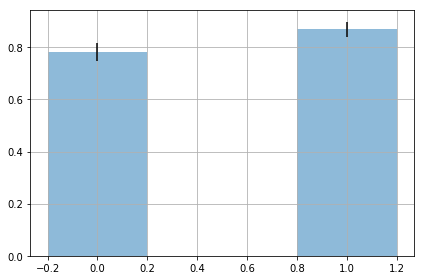

In [8]:
width = 0.4
plt.bar(range(2),
        [mean_p, mean_r],
        yerr=np.fabs(np.vstack([conf_p - mean_p, conf_r - mean_r]).T),
        width=width);

In [9]:
samples_p = stats.beta.rvs(a=TP + prior_lambda, b=FP + prior_lambda, size=10000)
samples_r = stats.beta.rvs(a=TP + prior_lambda, b=FN + prior_lambda, size=10000)
samples_f1 = 2 * samples_p * samples_r / (samples_p + samples_r)

In [10]:
mean_f1 = samples_f1.mean()
conf_f1 = np.percentile(samples_f1, [2.5, 97.5])

In [11]:
mean_f1, conf_f1

(0.8246198874458504, array([0.80047039, 0.84738133]))

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


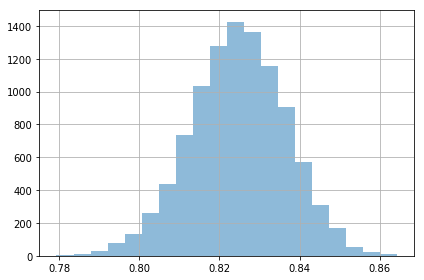

In [12]:
plt.hist(samples_f1, bins=20);

In [13]:
data = load_breast_cancer()

In [14]:
y = data.target
X = data.data

In [15]:
X.shape, y.shape

((569, 30), (569,))

In [16]:
# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

In [17]:
# Create a simple classifier
classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
y_pred = classifier.predict(X_test)

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       174
           1       0.95      0.87      0.91       282

    accuracy                           0.89       456
   macro avg       0.88      0.90      0.89       456
weighted avg       0.90      0.89      0.89       456



In [19]:
N = len(y_test)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

In [20]:
print(confusion_matrix(y_test, y_pred))

[[162  12]
 [ 38 244]]


In [21]:
print(confusion_matrix(y_test, y_pred).ravel())

[162  12  38 244]


In [22]:
TN, FP, FN, TP

(162, 12, 38, 244)

In [23]:
mean_p = (TP + 1) / (TP + FP + 2)
conf_p = stats.beta.ppf([0.025, .975], a=TP + prior_lambda, b=FP + prior_lambda)
mean_r = (TP + 1) / (TP + FN + 2)
conf_r = stats.beta.ppf([0.025, .975], a=TP + prior_lambda, b=FN + prior_lambda)

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


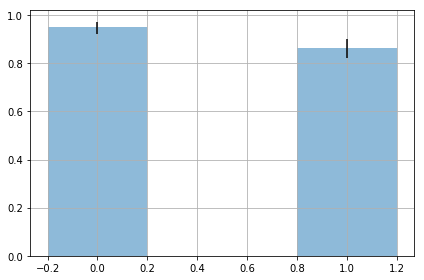

In [24]:
width = 0.4
plt.bar(range(2),
        [mean_p, mean_r],
        yerr=np.fabs(np.vstack([conf_p - mean_p, conf_r - mean_r]).T),
        width=width);

In [25]:
samples_p = stats.beta.rvs(a=TP + prior_lambda, b=FP + prior_lambda, size=10000)
samples_r = stats.beta.rvs(a=TP + prior_lambda, b=FN + prior_lambda, size=10000)
samples_f1 = 2 * samples_p * samples_r / (samples_p + samples_r)

In [26]:
mean_f1 = samples_f1.mean()
conf_f1 = np.percentile(samples_f1, [2.5, 97.5])

In [27]:
mean_f1, conf_f1

(0.903894335159434, array([0.87697937, 0.92746617]))

In [28]:
len(samples_f1)

10000

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


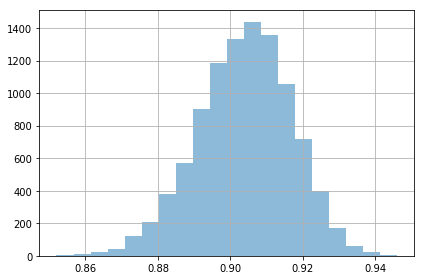

In [29]:
plt.hist(samples_f1, bins=20);

In [30]:
p_level = 0.05
np.percentile(samples_f1, [100 * p_level / 2, 100 * (1 - p_level / 2)])

array([0.87697937, 0.92746617])

In [31]:
n_bootstrap = 10000
pairs = np.array([y_test, y_pred])
f1_values = []
for i in tqdm(range(n_bootstrap)):
    samples_bootstrap = pairs[:, np.random.randint(pairs.shape[1], size=pairs.shape[1])]
    f1_values.append(f1_score(samples_bootstrap[0], samples_bootstrap[1]))

  0%|          | 0/10000 [00:00<?, ?it/s]

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


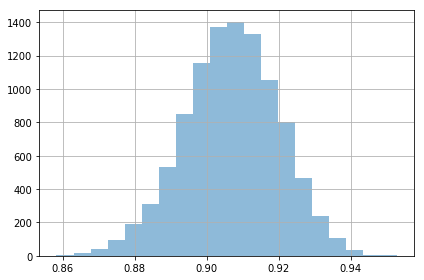

In [32]:
plt.hist(f1_values, bins=20);

In [33]:
np.percentile(f1_values, [100 * p_level / 2, 100 * (1 - p_level / 2)])

array([0.88      , 0.93165468])

# Implementation of classification report for binary problems

In [34]:
def classification_report_with_confidence(y_true, y_pred, alpha=0.95, labels=None, target_names=None,
                          sample_weight=None, digits=2, output_dict=False):
    labels_given = True
    if labels is None:
        labels = set(y_true)
        labels.update(y_pred)
        labels_given = False
    else:
        labels = np.asarray(labels)

    N = len(y_true)
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

    if target_names is None:
        target_names = ['%s' % l for l in labels]

    headers = ["precision", "recall", "f1-score", "support"]
    # compute per-class results without averaging
    p_level = 1 - alpha
    
    p = []
    r = []
    f1 = []
    s = []
    
    # negative class
    mean_p = (TN + 1) / (TN + FN + 2)
    conf_p = stats.beta.ppf([p_level / 2, 1 - p_level / 2], a=TN + prior_lambda, b=FN + prior_lambda)
    mean_r = (TN + 1) / (TN + FP + 2)
    conf_r = stats.beta.ppf([p_level / 2, 1 - p_level / 2], a=TN + prior_lambda, b=FP + prior_lambda)
    
    samples_p = stats.beta.rvs(a=TN + prior_lambda, b=FN + prior_lambda, size=10000)
    samples_r = stats.beta.rvs(a=TN + prior_lambda, b=FP + prior_lambda, size=10000)
    samples_f1 = 2 * samples_p * samples_r / (samples_p + samples_r)
    
    mean_f1 = samples_f1.mean()
    conf_f1 = np.percentile(samples_f1, [100 * p_level / 2, 100 * (1 - p_level / 2)])
    
    p.append([conf_p[0], mean_p, conf_p[1]])
    r.append([conf_r[0], mean_r, conf_r[1]])
    f1.append([conf_f1[0], mean_f1, conf_f1[1]])
    s.append(TN + FP)
    
    # positive class
    mean_p = (TP + 1) / (TP + FP + 2)
    conf_p = stats.beta.ppf([p_level / 2, 1 - p_level / 2], a=TP + prior_lambda, b=FP + prior_lambda)
    mean_r = (TP + 1) / (TP + FN + 2)
    conf_r = stats.beta.ppf([p_level / 2, 1 - p_level / 2], a=TP + prior_lambda, b=FN + prior_lambda)
    
    samples_p = stats.beta.rvs(a=TP + prior_lambda, b=FP + prior_lambda, size=10000)
    samples_r = stats.beta.rvs(a=TP + prior_lambda, b=FN + prior_lambda, size=10000)
    samples_f1 = 2 * samples_p * samples_r / (samples_p + samples_r)
    
    mean_f1 = samples_f1.mean()
    conf_f1 = np.percentile(samples_f1, [100 * p_level / 2, 100 * (1 - p_level / 2)])
    
    p.append([conf_p[0], mean_p, conf_p[1]])
    r.append([conf_r[0], mean_r, conf_r[1]])
    f1.append([conf_f1[0], mean_f1, conf_f1[1]])
    s.append(TP + FN)
    
    rows = [(e[0], *e[1], *e[2], *e[3], e[4]) for e in zip(target_names, p, r, f1, s)]

    longest_last_line_heading = 'weighted avg'
    name_width = max(len(cn) for cn in target_names)
    width = max(name_width, len(longest_last_line_heading), digits)
    column_width = 9 + 2 * (6 + digits)
    support_column_witdh = max(len("  support"), max([len(str(elem)) for elem in s]))
    head_fmt = '{:>{width}s} ' + ' {:>{column_width}}' * (len(headers) - 1) + ' {:>{support_column_witdh}}'
    report = head_fmt.format('', *headers, width=width, column_width=column_width, support_column_witdh=support_column_witdh)
    report += '\n\n'
    #row_fmt = '{:>{width}s} ' + ' {:>9.{digits}f} -- {:>9.{digits}f} -- {:>9.{digits}f} ' * 3 + ' {:>9}\n'
    #row_fmt = '{:>{width}s} ' + ' {:>9.{digits}f} -- {:.{digits}f} -- {:.{digits}f}' * 3 + ' {:>9}\n'
    row_fmt = '{:>{width}s} ' + ' {:>9.{digits}f} -- {:.{digits}f} -- {:.{digits}f}' * 3 + ' {:>{support_column_witdh}}\n'
    #print(row_fmt)
    for row in rows:
        #print(chain.from_iterable(row))
        report += row_fmt.format(*row, width=width, digits=digits, support_column_witdh=support_column_witdh)
    report += '\n'
    
    return report

In [35]:
print(classification_report_with_confidence(y_test, y_pred, digits=3))

                                precision                      recall                    f1-score   support

           0      0.750 -- 0.807 -- 0.858     0.883 -- 0.926 -- 0.960     0.825 -- 0.862 -- 0.895       174
           1      0.920 -- 0.950 -- 0.973     0.820 -- 0.863 -- 0.900     0.877 -- 0.904 -- 0.928       282




In [36]:
print(classification_report_with_confidence(y_test, y_pred, digits=2))

                              precision                    recall                  f1-score   support

           0       0.75 -- 0.81 -- 0.86      0.88 -- 0.93 -- 0.96      0.82 -- 0.86 -- 0.90       174
           1       0.92 -- 0.95 -- 0.97      0.82 -- 0.86 -- 0.90      0.88 -- 0.90 -- 0.93       282




In [37]:
print(classification_report_with_confidence(y_test, y_pred, digits=2, alpha=0.9))

                              precision                    recall                  f1-score   support

           0       0.76 -- 0.81 -- 0.85      0.89 -- 0.93 -- 0.96      0.83 -- 0.86 -- 0.89       174
           1       0.93 -- 0.95 -- 0.97      0.83 -- 0.86 -- 0.89      0.88 -- 0.90 -- 0.92       282




In [38]:
%%timeit
classification_report_with_confidence(y_test, y_pred, digits=2, alpha=0.95);

9.86 ms ± 488 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [39]:
%%timeit
classification_report(y_test, y_pred);

3.28 ms ± 217 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       174
           1       0.95      0.87      0.91       282

    accuracy                           0.89       456
   macro avg       0.88      0.90      0.89       456
weighted avg       0.90      0.89      0.89       456



TODO :
- [x] formatting
- [x] extend to multi-class
- [ ] integrate different averages
- [ ] precision-recall curves ?

# Better implementation (preparing for multiclass problems)

In [41]:
def classification_report_with_confidence(y_true, y_pred, alpha=0.95, labels=None, target_names=None,
                          sample_weight=None, digits=2, output_dict=False):
    labels_given = True
    if labels is None:
        labels = set(y_true)
        labels.update(y_pred)
        labels_given = False
    else:
        labels = np.asarray(labels)

    N = len(y_true)
    conf_m = confusion_matrix(y_test, y_pred)

    if target_names is None:
        target_names = ['%s' % l for l in labels]

    headers = ["precision", "recall", "f1-score", "support"]
    # compute per-class results without averaging
    p_level = 1 - alpha
    
    p = []
    r = []
    f1 = []
    s = []
    
    for i, label in enumerate(labels):
        tp_class = conf_m[i, i]
        predicted_class = conf_m[:, i].sum()
        true_class = conf_m[i, :].sum()
        
        fp_class = predicted_class - tp_class
        fn_class = true_class - tp_class
    
        mean_p = (tp_class + 1) / (tp_class + fp_class + 2)
        conf_p = stats.beta.ppf([p_level / 2, 1 - p_level / 2], a=tp_class + prior_lambda, b=fp_class + prior_lambda)
        mean_r = (tp_class + 1) / (tp_class + fn_class + 2)
        conf_r = stats.beta.ppf([p_level / 2, 1 - p_level / 2], a=tp_class + prior_lambda, b=fn_class + prior_lambda)

        samples_p = stats.beta.rvs(a=tp_class + prior_lambda, b=fp_class + prior_lambda, size=10000)
        samples_r = stats.beta.rvs(a=tp_class + prior_lambda, b=fn_class + prior_lambda, size=10000)
        samples_f1 = 2 * samples_p * samples_r / (samples_p + samples_r)

        mean_f1 = samples_f1.mean()
        conf_f1 = np.percentile(samples_f1, [100 * p_level / 2, 100 * (1 - p_level / 2)])

        p.append([conf_p[0], mean_p, conf_p[1]])
        r.append([conf_r[0], mean_r, conf_r[1]])
        f1.append([conf_f1[0], mean_f1, conf_f1[1]])
        s.append(tp_class + fn_class)

    rows = [(e[0], *e[1], *e[2], *e[3], e[4]) for e in zip(target_names, p, r, f1, s)]

    longest_last_line_heading = 'weighted avg'
    name_width = max(len(cn) for cn in target_names)
    width = max(name_width, len(longest_last_line_heading), digits)
    column_width = 9 + 2 * (6 + digits)
    support_column_witdh = max(len("  support"), max([len(str(elem)) for elem in s]))
    head_fmt = '{:>{width}s} ' + ' {:>{column_width}}' * (len(headers) - 1) + ' {:>{support_column_witdh}}'
    report = head_fmt.format('', *headers, width=width, column_width=column_width, support_column_witdh=support_column_witdh)
    report += '\n\n'
    #row_fmt = '{:>{width}s} ' + ' {:>9.{digits}f} -- {:>9.{digits}f} -- {:>9.{digits}f} ' * 3 + ' {:>9}\n'
    #row_fmt = '{:>{width}s} ' + ' {:>9.{digits}f} -- {:.{digits}f} -- {:.{digits}f}' * 3 + ' {:>9}\n'
    row_fmt = '{:>{width}s} ' + ' {:>9.{digits}f} -- {:.{digits}f} -- {:.{digits}f}' * 3 + ' {:>{support_column_witdh}}\n'
    #print(row_fmt)
    for row in rows:
        #print(chain.from_iterable(row))
        report += row_fmt.format(*row, width=width, digits=digits, support_column_witdh=support_column_witdh)
    report += '\n'
    
    return report

In [3]:
def generate_samples(y_true, y_pred, alpha=0.95, prior_lambda=1):
    N = len(y_true)
    conf_m = confusion_matrix(y_test, y_pred)

    headers = ["precision", "recall", "f1-score", "support"]
    # compute per-class results without averaging
    p_level = 1 - alpha
    
    p = []
    r = []
    f1 = []
    s = []
    
    for i, label in enumerate(sorted(set(y_true))):
        tp_class = conf_m[i, i]
        predicted_class = conf_m[:, i].sum()
        true_class = conf_m[i, :].sum()
        
        fp_class = predicted_class - tp_class
        fn_class = true_class - tp_class
    
        samples_p = stats.beta.rvs(a=tp_class + prior_lambda, b=fp_class + prior_lambda, size=10000)
        samples_r = stats.beta.rvs(a=tp_class + prior_lambda, b=fn_class + prior_lambda, size=10000)
        samples_f1 = 2 * samples_p * samples_r / (samples_p + samples_r)

        p.append(samples_p)
        r.append(samples_r)
        f1.append(samples_f1)
        s.append(tp_class + fn_class)
    
    return p, r, f1, s

def classification_report_with_confidence(y_true, y_pred, alpha=0.95, labels=None, target_names=None,
                          sample_weight=None, digits=2, output_dict=False):
    labels_given = True
    if labels is None:
        labels = set(y_true)
        labels.update(set(y_pred))
        labels_given = False
    else:
        labels = np.asarray(labels)

    N = len(y_true)
    conf_m = confusion_matrix(y_test, y_pred)

    if target_names is None:
        target_names = ['%s' % l for l in labels]

    headers = ["precision", "recall", "f1-score", "support"]
    # compute per-class results without averaging
    
    samples_p, samples_r, samples_f1, s = generate_samples(y_true, y_pred, alpha, prior_lambda)
    
    p_stats = []
    r_stats = []
    f1_stats = []
    for i in range(len(labels)):
        mean_p = samples_p[i].mean()
        conf_p = np.percentile(samples_p[i], [100 * p_level / 2, 100 * (1 - p_level / 2)])
        p_stats.append([conf_p[0], mean_p, conf_p[1]])
        
        mean_r = samples_r[i].mean()
        conf_r = np.percentile(samples_r[i], [100 * p_level / 2, 100 * (1 - p_level / 2)])
        r_stats.append([conf_r[0], mean_r, conf_r[1]])
        
        mean_f1 = samples_f1[i].mean()
        conf_f1 = np.percentile(samples_f1, [100 * p_level / 2, 100 * (1 - p_level / 2)])
        f1_stats.append([conf_f1[0], mean_f1, conf_f1[1]])

    rows = [(e[0], *e[1], *e[2], *e[3], e[4]) for e in zip(target_names, p_stats, r_stats, f1_stats, s)]

    longest_last_line_heading = 'weighted avg'
    name_width = max(len(cn) for cn in target_names)
    width = max(name_width, len(longest_last_line_heading), digits)
    column_width = 9 + 2 * (6 + digits)
    support_column_witdh = max(len("  support"), max([len(str(elem)) for elem in s]))
    head_fmt = '{:>{width}s} ' + ' {:>{column_width}}' * (len(headers) - 1) + ' {:>{support_column_witdh}}'
    report = head_fmt.format('', *headers, width=width, column_width=column_width, support_column_witdh=support_column_witdh)
    report += '\n\n'
    #row_fmt = '{:>{width}s} ' + ' {:>9.{digits}f} -- {:>9.{digits}f} -- {:>9.{digits}f} ' * 3 + ' {:>9}\n'
    #row_fmt = '{:>{width}s} ' + ' {:>9.{digits}f} -- {:.{digits}f} -- {:.{digits}f}' * 3 + ' {:>9}\n'
    row_fmt = '{:>{width}s} ' + ' {:>9.{digits}f} -- {:.{digits}f} -- {:.{digits}f}' * 3 + ' {:>{support_column_witdh}}\n'
    #print(row_fmt)
    for row in rows:
        #print(chain.from_iterable(row))
        report += row_fmt.format(*row, width=width, digits=digits, support_column_witdh=support_column_witdh)
    report += '\n'
    
    return report

In [98]:
data = load_digits()

In [99]:
y = data.target
X = data.data

In [100]:
X.shape, y.shape

((1797, 64), (1797,))

In [101]:
# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9)

In [102]:
# Create a simple classifier
classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
y_pred = classifier.predict(X_test)

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       166
           1       0.79      0.92      0.85       158
           2       0.98      0.82      0.89       165
           3       0.85      0.87      0.86       165
           4       0.95      0.89      0.92       161
           5       0.92      0.92      0.92       165
           6       0.95      0.96      0.96       164
           7       0.95      0.87      0.91       164
           8       0.79      0.61      0.69       157
           9       0.70      0.93      0.80       153

    accuracy                           0.88      1618
   macro avg       0.88      0.88      0.88      1618
weighted avg       0.88      0.88      0.88      1618



In [120]:
print(classification_report_with_confidence(y_test, y_pred, digits=2))

                              precision                    recall                  f1-score   support

           0       0.92 -- 0.95 -- 0.98      0.92 -- 0.96 -- 0.98      0.67 -- 0.96 -- 0.97       166
           1       0.73 -- 0.79 -- 0.85      0.87 -- 0.92 -- 0.96      0.67 -- 0.85 -- 0.97       158
           2       0.94 -- 0.97 -- 0.99      0.76 -- 0.82 -- 0.87      0.67 -- 0.89 -- 0.97       165
           3       0.78 -- 0.84 -- 0.89      0.81 -- 0.86 -- 0.91      0.67 -- 0.85 -- 0.97       165
           4       0.90 -- 0.94 -- 0.97      0.84 -- 0.89 -- 0.93      0.67 -- 0.91 -- 0.97       161
           5       0.86 -- 0.91 -- 0.95      0.86 -- 0.91 -- 0.95      0.67 -- 0.91 -- 0.97       165
           6       0.91 -- 0.95 -- 0.97      0.92 -- 0.96 -- 0.98      0.67 -- 0.95 -- 0.97       164
           7       0.90 -- 0.94 -- 0.97      0.81 -- 0.87 -- 0.91      0.67 -- 0.90 -- 0.97       164
           8       0.71 -- 0.78 -- 0.85      0.53 -- 0.61 -- 0.68      0.67 -- 0.

In [121]:
p, r, f1, s = generate_samples(y_test, y_pred)

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


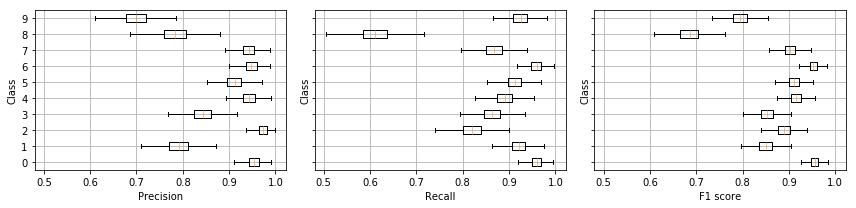

In [136]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 3), sharex=True, sharey=True)
for i, (samples, metric_name) in enumerate([(p, "Precision"), (r, "Recall"), (f1, "F1 score")]):
    ax[i].boxplot(samples, vert=False, labels=sorted(set(y_test)), showfliers=False)
    ax[i].set_ylabel("Class")
    ax[i].set_xlabel(metric_name)
fig.tight_layout();

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


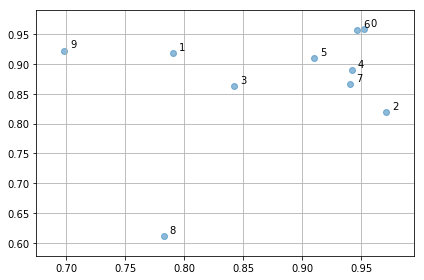

In [148]:
x, y = [elem.mean() for elem in p], [elem.mean() for elem in r]
plt.scatter(x, y)
for x_position, y_position, label in zip(x, y, map(str, sorted(set(y_test)))):
    plt.text(x_position + 0.005, y_position + 0.005, label);

In [144]:
list(map(str, sorted(set(y_test))))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [49]:
# Create a simple classifier
classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
y_pred = classifier.predict(X_test)

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       152
           1       0.76      0.85      0.80       165
           2       0.97      0.97      0.97       159
           3       0.90      0.88      0.89       168
           4       0.97      0.92      0.95       159
           5       0.98      0.93      0.95       168
           6       0.98      0.95      0.97       164
           7       0.92      0.92      0.92       163
           8       0.82      0.72      0.77       156
           9       0.83      0.91      0.87       164

    accuracy                           0.90      1618
   macro avg       0.91      0.90      0.90      1618
weighted avg       0.91      0.90      0.90      1618



In [51]:
print(classification_report_with_confidence(y_test, y_pred, digits=2))

                              precision                    recall                  f1-score   support

           0       0.87 -- 0.92 -- 0.95      0.98 -- 0.99 -- 1.00      0.93 -- 0.95 -- 0.97       152
           1       0.69 -- 0.76 -- 0.82      0.79 -- 0.84 -- 0.90      0.75 -- 0.80 -- 0.84       165
           2       0.93 -- 0.96 -- 0.99      0.93 -- 0.96 -- 0.99      0.94 -- 0.96 -- 0.98       159
           3       0.85 -- 0.90 -- 0.94      0.82 -- 0.87 -- 0.92      0.85 -- 0.88 -- 0.92       168
           4       0.93 -- 0.97 -- 0.99      0.87 -- 0.92 -- 0.96      0.91 -- 0.94 -- 0.97       159
           5       0.95 -- 0.98 -- 0.99      0.88 -- 0.92 -- 0.96      0.92 -- 0.95 -- 0.97       168
           6       0.95 -- 0.98 -- 0.99      0.91 -- 0.95 -- 0.97      0.94 -- 0.96 -- 0.98       164
           7       0.87 -- 0.92 -- 0.95      0.87 -- 0.92 -- 0.95      0.88 -- 0.92 -- 0.94       163
           8       0.75 -- 0.82 -- 0.88      0.64 -- 0.72 -- 0.78      0.71 -- 0.

In [52]:
%%timeit
classification_report_with_confidence(y_test, y_pred, digits=2, alpha=0.95);

46.4 ms ± 3.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
%%timeit
classification_report(y_test, y_pred);

6.59 ms ± 633 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [54]:
# Create a simple classifier
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
#y_score = classifier.decision_function(X_test)
y_pred = classifier.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       152
           1       0.68      0.63      0.65       165
           2       0.91      0.77      0.83       159
           3       0.83      0.82      0.82       168
           4       0.86      0.92      0.89       159
           5       0.99      0.80      0.88       168
           6       0.93      0.94      0.94       164
           7       0.89      0.94      0.92       163
           8       0.66      0.75      0.70       156
           9       0.69      0.77      0.73       164

    accuracy                           0.83      1618
   macro avg       0.84      0.83      0.83      1618
weighted avg       0.84      0.83      0.83      1618



In [56]:
print(classification_report_with_confidence(y_test, y_pred, digits=2))

                              precision                    recall                  f1-score   support

           0       0.90 -- 0.94 -- 0.97      0.96 -- 0.99 -- 1.00      0.94 -- 0.96 -- 0.98       152
           1       0.60 -- 0.67 -- 0.74      0.55 -- 0.63 -- 0.70      0.60 -- 0.65 -- 0.70       165
           2       0.85 -- 0.90 -- 0.95      0.70 -- 0.76 -- 0.83      0.78 -- 0.83 -- 0.87       159
           3       0.76 -- 0.82 -- 0.88      0.75 -- 0.81 -- 0.87      0.77 -- 0.82 -- 0.86       168
           4       0.80 -- 0.86 -- 0.91      0.87 -- 0.91 -- 0.95      0.85 -- 0.89 -- 0.92       159
           5       0.95 -- 0.98 -- 1.00      0.73 -- 0.79 -- 0.85      0.84 -- 0.88 -- 0.91       168
           6       0.88 -- 0.93 -- 0.96      0.89 -- 0.93 -- 0.97      0.90 -- 0.93 -- 0.96       164
           7       0.83 -- 0.89 -- 0.93      0.90 -- 0.94 -- 0.97      0.88 -- 0.91 -- 0.94       163
           8       0.59 -- 0.66 -- 0.73      0.68 -- 0.75 -- 0.81      0.65 -- 0.

In [57]:
n_bootstrap = 10000
pairs = np.array([y_test, y_pred])
f1_values = []
for i in tqdm(range(n_bootstrap)):
    samples_bootstrap = pairs[:, np.random.randint(pairs.shape[1], size=pairs.shape[1])]
    f1_values.append(f1_score(samples_bootstrap[0], samples_bootstrap[1], average=None))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [58]:
np.percentile(f1_values, [100 * p_level / 2, 100 * (1 - p_level / 2)])

array([0.62962963, 0.97506925])

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


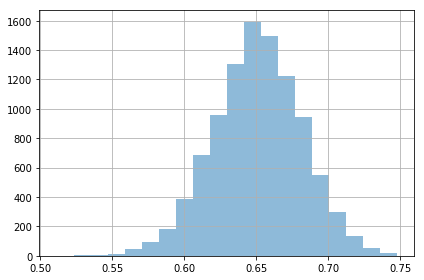

In [59]:
v = np.array(f1_values)[:, 1]
plt.hist(v, bins=20);

In [60]:
np.percentile(v, [100 * p_level / 2, 100 * (1 - p_level / 2)]), np.mean(v), np.median(v)

(array([0.58908966, 0.70988111]), 0.6508722987752334, 0.6511627906976745)

# Precision-recall curves

In [4]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [5]:
from sklearn.datasets import load_iris, load_breast_cancer, load_digits

In [6]:
data = load_breast_cancer()

In [7]:
y = data.target
X = data.data

In [8]:
X.shape, y.shape

((569, 30), (569,))

In [9]:
# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

In [190]:
# Create a simple classifier
classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
y_pred = classifier.predict(X_test)

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [191]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       167
           1       0.89      0.99      0.94       289

    accuracy                           0.92       456
   macro avg       0.94      0.89      0.91       456
weighted avg       0.92      0.92      0.92       456



In [192]:
# Create a simple classifier
classifier = CalibratedClassifierCV(svm.LinearSVC(max_iter=5000), cv=10)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/s

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.77      0.86       167
           1       0.88      1.00      0.94       289

    accuracy                           0.91       456
   macro avg       0.94      0.88      0.90       456
weighted avg       0.92      0.91      0.91       456



In [10]:
# Create a simple classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       171
           1       0.96      0.95      0.96       285

    accuracy                           0.95       456
   macro avg       0.94      0.95      0.94       456
weighted avg       0.95      0.95      0.95       456



/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


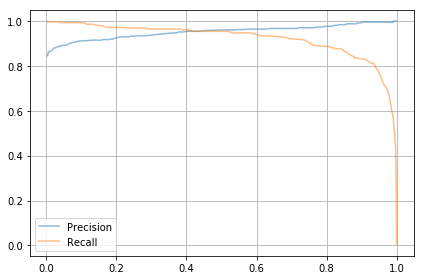

In [12]:
precision_values, recall_values, threshold_values = precision_recall_curve(y_test, y_score[:, 1])
fig, ax = plt.subplots()
ax.plot(threshold_values, precision_values[:-1], label="Precision")
ax.plot(threshold_values, recall_values[:-1], label="Recall")
ax.legend()
#ax.set_xlim(threshold_values.min(), threshold_values.max())
fig.tight_layout();

In [197]:
n_bootstrap = 1000
pairs = np.array([y_test, y_score[:, 1]])
precision_values = []
recall_values = []
thresholds = np.linspace(0, 1, 100)
for i in tqdm(range(n_bootstrap)):
    samples_bootstrap = pairs[:, np.random.randint(pairs.shape[1], size=pairs.shape[1])]
    y_pred = [(samples_bootstrap[1] >= th).astype(int) for th in thresholds]
    precision_values.append([precision_score(samples_bootstrap[0], elem) for elem in y_pred])
    recall_values.append([recall_score(samples_bootstrap[0], elem) for elem in y_pred])

  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


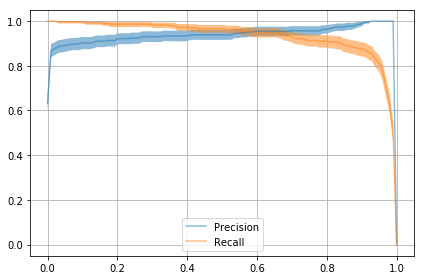

In [198]:
fig, ax = plt.subplots()
ax.plot(thresholds, np.array(precision_values).mean(axis=0), label="Precision")
ax.plot(thresholds, np.array(recall_values).mean(axis=0), label="Recall")
ax.fill_between(thresholds, *np.percentile(np.array(precision_values), [5, 95], axis=0))
ax.fill_between(thresholds, *np.percentile(np.array(recall_values), [5, 95], axis=0))
ax.legend(loc=8)
#ax.set_xlim(threshold_values.min(), threshold_values.max())
fig.tight_layout();

In [13]:
fpr, tpr, th = roc_curve(y_test, y_score[:, 1])


/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


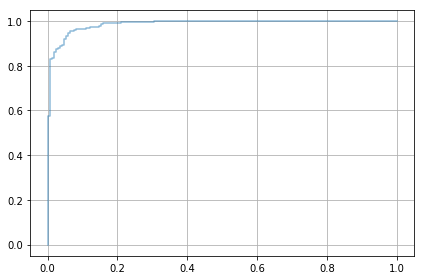

In [14]:
plt.plot(fpr, tpr);

In [15]:
p, r, f1, s = generate_samples(y_test, y_pred)

In [ ]:
plt.plot(1 - np.array(p), r);

KeyboardInterrupt: 

In [20]:
np.percentile((1 - np.array(p))[1], [5, 95])

array([0.02438015, 0.06372101])

In [ ]:
fig, ax = plt.subplots()
ax.plot(threshold_values, precision_values[:-1], label="Precision")
ax.plot(threshold_values, recall_values[:-1], label="Recall")
ax.legend()
#ax.set_xlim(threshold_values.min(), threshold_values.max())
fig.tight_layout();

In [21]:
n_bootstrap = 100
pairs = np.array([y_test, y_score[:, 1]])
fpr = []
tpr = []
thresholds = np.linspace(0, 1, 100)
for i in tqdm(range(n_bootstrap)):
    samples_bootstrap = pairs[:, np.random.randint(pairs.shape[1], size=pairs.shape[1])]
    y_pred = [(samples_bootstrap[1] >= th).astype(int) for th in thresholds]
    fpr.append([1 - precision_score(samples_bootstrap[0], elem) for elem in y_pred])
    tpr.append([recall_score(samples_bootstrap[0], elem) for elem in y_pred])

  0%|          | 0/100 [00:00<?, ?it/s]

/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


No handles with labels found to put in legend.
/Users/cchastagnol/miniconda3/envs/my_blog/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


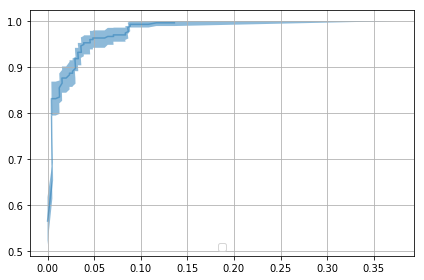

In [36]:
fig, ax = plt.subplots()
ax.plot(np.array(fpr).mean(axis=0)[1:-1], np.array(tpr).mean(axis=0)[1:-1])
ax.fill_between(np.array(fpr).mean(axis=0)[:-1], *(np.percentile(np.array(tpr), [5, 95], axis=0)[:, :-1]))
#ax.fill_between(thresholds, *np.percentile(np.array(recall_values), [5, 95], axis=0))
ax.legend(loc=8)
#ax.set_xlim(threshold_values.min(), threshold_values.max())
fig.tight_layout();